<a href="https://colab.research.google.com/github/andoanminhkhanh/trituenhantao/blob/main/Test_mobienet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import tensorflow as tf
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [27]:
from imutils import paths

imgTest = list(paths.list_images("/content/drive/MyDrive/AI/data/train"))

In [28]:
X_test = []
y_test = []

In [29]:
for path_test in imgTest:
    Y_test = path_test.split(os.path.sep)[-2]

    # Xu ly anh
    img1 = cv2.imread(path_test)

    if img1 is None:
        print("Lỗi: Không thể đọc hình ảnh từ đường dẫn:", path_test)
        continue

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img1 = cv2.resize(img1, (150, 150))

    # Them vao du lieu data va label
    X_test.append(img1)
    y_test.append(Y_test)

In [30]:
lb = LabelBinarizer()
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = lb.fit_transform(y_test)
X_test = X_test.astype('float32') / 255

In [31]:
# List files in the model directory
!ls "/content/drive/MyDrive/AI/model/"

 Moblienet  'Moblienet 1'   Moblienet1	 Moblienet1.h5


In [32]:
import os
os.listdir('/content/drive/MyDrive/AI/model')

['Moblienet', 'Moblienet1', 'Moblienet 1', 'Moblienet1.h5']

In [34]:
# Load the model, ensuring the path is correct
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/AI/model/Moblienet1.h5')

In [35]:
y_pred = loaded_model.predict(X_test)

65/65 [==============================] - 39s 590ms/step


In [36]:
y_pred

array([[9.99999940e-01, 1.27138176e-08],
       [9.99807835e-01, 1.92123785e-04],
       [9.99998868e-01, 1.02982619e-06],
       ...,
       [2.53662234e-03, 9.97463286e-01],
       [2.74420101e-02, 9.72557962e-01],
       [3.61982673e-01, 6.38017356e-01]], dtype=float32)

In [37]:
max_indices = np.argmax(y_pred, axis=1)

In [38]:
y_pred_new = np.zeros_like(max_indices)
y_pred_new[max_indices == 1] = 1
y_pred_new[max_indices == 2] = 2

In [39]:
y_pred_new

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
y_test_new = np.array(y_test).reshape(-1)

# In kết quả
print(y_test_new)

[0 0 0 ... 1 1 1]


Kiểm thử một ảnh cụ thể

In [41]:
labels = ['Pneumonia', 'Bình thường']

In [42]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 50ms/step
[[2.4387234e-07 9.9999976e-01]]
- Bình thường:  0.0 %
- Viêm phổi:  100.0 %
--> Nhãn dự đoán:  Viêm phổi


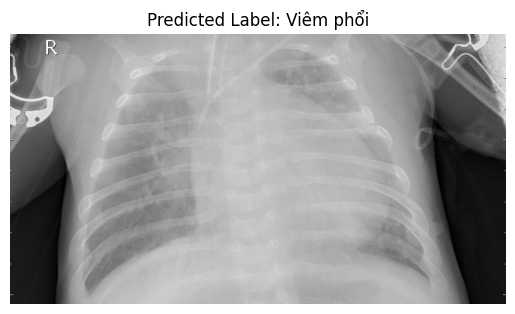

In [55]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('/content/drive/MyDrive/AI/data/test/PNEUMONIA/person1_virus_7.jpeg')

# Đổi kích thước ảnh về 150x150
img_resize = cv2.resize(img, (150, 150))

# Chuẩn hóa giá trị pixel về khoảng [0, 1]
img_resize = img_resize / 255.0

# Thêm một chiều để khớp với đầu vào của mô hình
img_resize = np.expand_dims(img_resize, axis=0)  # Thêm chiều batch

# Dự đoán
yhat = loaded_model.predict(img_resize)
max_index = np.argmax(yhat)
labels = ['Bình thường', 'Viêm phổi']  # Đảm bảo rằng các nhãn được định nghĩa trước

# In kết quả
print(yhat)
print('- Bình thường: ', round(yhat[0][0]*100,2), "%")
print('- Viêm phổi: ', round(yhat[0][1]*100,2), "%")
print("--> Nhãn dự đoán: ", labels[max_index])

  # Hiển thị ảnh
plt.imshow(img, cmap='gray')  # Hiển thị ảnh xám
plt.axis('off')
plt.title(f"Predicted Label: {labels[max_index]}")
plt.show()

1/1 [==============================] - 0s 73ms/step
[[9.994617e-01 5.383049e-04]]
- Bình thường:  99.95 %
- Viêm phổi:  0.05 %
--> Nhãn dự đoán:  Bình thường


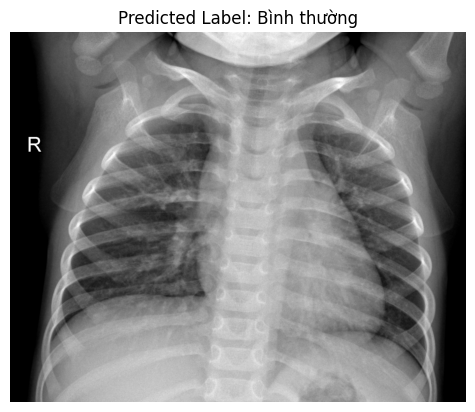

In [56]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('/content/drive/MyDrive/AI/data/test/NORMAL/NORMAL2-IM-0433-0001.jpeg')

# Đổi kích thước ảnh về 150x150
img_resize = cv2.resize(img, (150, 150))

# Chuẩn hóa giá trị pixel về khoảng [0, 1]
img_resize = img_resize / 255.0

# Thêm một chiều để khớp với đầu vào của mô hình
img_resize = np.expand_dims(img_resize, axis=0)  # Thêm chiều batch

# Dự đoán
yhat = loaded_model.predict(img_resize)
max_index = np.argmax(yhat)
labels = ['Bình thường', 'Viêm phổi']  # Đảm bảo rằng các nhãn được định nghĩa trước

# In kết quả
print(yhat)
print('- Bình thường: ', round(yhat[0][0]*100,2), "%")
print('- Viêm phổi: ', round(yhat[0][1]*100,2), "%")
print("--> Nhãn dự đoán: ", labels[max_index])

  # Hiển thị ảnh
plt.imshow(img, cmap='gray')  # Hiển thị ảnh xám
plt.axis('off')
plt.title(f"Predicted Label: {labels[max_index]}")
plt.show()

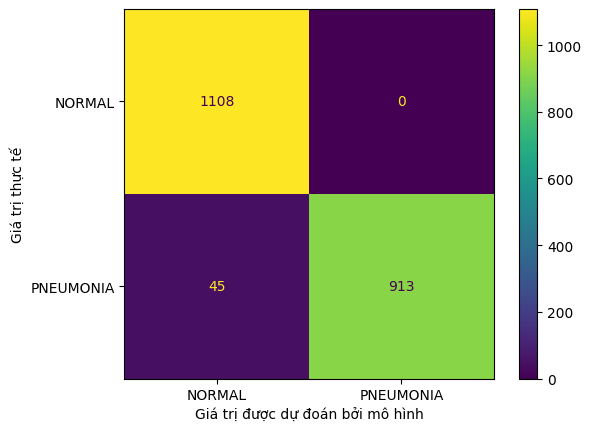

In [57]:
# Ma trận nhầm lẫn dạng đồ thị
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
matran = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_new, y_pred_new), display_labels = ['NORMAL','PNEUMONIA'])
matran.plot()
plt.xlabel('Giá trị được dự đoán bởi mô hình')
plt.ylabel('Giá trị thực tế')
plt.show()

In [58]:
set(y_test_new)

{0, 1}

In [59]:
set(y_pred_new)

{0, 1}

In [60]:
max_indices1 = np.argmax(y_test, axis=1)
y_test_new = np.zeros_like(max_indices1)
y_test_new[max_indices1 == 1] = 1
y_test_new[max_indices1 == 2] = 2

In [61]:
y_test_new

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score
print("Độ chính xác của mô hình: ",accuracy_score(y_test_new, y_pred_new) * 100, "%")

Độ chính xác của mô hình:  55.80832526621491 %


In [63]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Tính và hiển thị classification report
report = classification_report(y_test_new, y_pred_new, target_names=['Bình thường', 'Viêm phổi'], output_dict=True)
print("Classification Report:\n", classification_report(y_test_new, y_pred_new, target_names=['Bình thường', 'Viêm phổi']))

# Lấy macro-averaged F1-score
macro_f1 = report['macro avg']['f1-score']
print("Macro-averaged F1-score:", macro_f1)

Classification Report:
               precision    recall  f1-score   support

 Bình thường       1.00      0.56      0.72      2066
   Viêm phổi       0.00      0.00      0.00         0

    accuracy                           0.56      2066
   macro avg       0.50      0.28      0.36      2066
weighted avg       1.00      0.56      0.72      2066

Macro-averaged F1-score: 0.3581857719788754


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin